In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import os
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from pykalman import KalmanFilter
from statistics import mean
from tqdm import tqdm

In [2]:
data=pd.read_csv("time_series_data_human_activities.csv")
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [3]:
df=pd.read_csv("df.csv")
df.head()

,Downstairs1,Downstairs3,Downstairs4,Downstairs5,Downstairs6,Downstairs7,Downstairs8,Downstairs10,Downstairs11,Downstairs12,...,Walking27,Walking28,Walking29,Walking30,Walking31,Walking32,Walking33,Walking34,Walking35,Walking36
0,0.9383656811415211,3.39074346717131,1.8016740228767874,-0.12229990436046104,-0.9002540395748423,7.2838969182805755,3.661241382181386,0.8026843335271494,3.8010178902579628,-0.759686829589223,...,1.8799421447833593,-1.8848658929722029,3.2252427759401723,10.57558917147943,-1.7688331098841856,-0.754533609076353,-0.46026855221875357,0.6097674986595581,2.620010733714559,0.5416834630171719
1,-0.236816069909301,2.2351042661297993,1.6695711023867232,-0.014898707693638281,0.31654696290140927,3.421940296613532,2.949593724050778,1.9319192817728559,2.4627451455963887,0.4111493729868005,...,1.217630413122788,-0.4696459475371739,1.5290050214549278,6.400818304591295,-0.7018446835382346,-0.22110211201130717,-0.2659318278882823,1.6741076776494717,0.21291335425077607,0.0595926695987306
2,0.3804263340285788,-0.23157842273158113,-0.7258150862187329,-0.6535699043623799,-0.20579957869791443,-0.31310724611260554,2.533560870284319,0.3526930749099767,-1.1840237029516922,-0.8932430797816577,...,-0.24914634017453635,1.8356729576870094,0.07913299841117327,-0.478679100450814,-0.22026262330671809,-0.22276975240140875,-0.013998066007812553,0.09742530992493842,-0.10567971782391146,0.05508672449837062
3,15.73344728576019,9.891851388053778,14.468255053697982,12.736298299406545,14.75972884666518,7.855031520140405,11.389380270744052,15.946017005761139,11.415195551982968,10.47280918007961,...,15.334937364636417,14.235484521860373,13.961380834872088,4.566082460104274,15.083629593448844,16.416979259512505,14.568283653884217,16.239253409030532,15.89492845946044,15.051138934780319
4,8.286587491607436,4.302124911402139,5.631201955686861,6.749837555967655,7.8546702856884245,4.157223451338883,9.367882472634742,8.08674335521526,3.5931214637085866,6.1217081895463945,...,7.742419393209812,5.970363082563644,8.542506348806645,2.1340432722979883,7.7893678147627865,8.871523288873053,7.196357021100073,7.992747460386666,3.399107440416371,8.234496742790657


In [4]:
np.array(df[:-1]).reshape((223392,5))

ValueError: cannot reshape array of size 2233920 into shape (223392,5)

In [4]:
#Splitting data
tmp=data.groupby('activity')['user'].unique()
l=[]
for i in tmp.keys():
    l.append(tmp[i])
from functools import reduce
comm=list(reduce(lambda i, j: i & j, (set(n) for n in l)))

In [5]:
label=df.to_numpy()[-1]
dp=df.to_numpy()[:-1]

In [7]:
len(label)

179

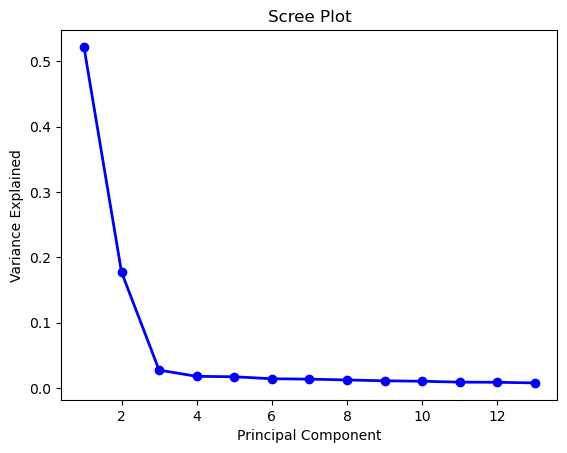

In [6]:
scaler = MinMaxScaler()
data_pca=dp.T
data_rescaled = scaler.fit_transform(data_pca)
pca = PCA(n_components=0.85).fit(data_rescaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

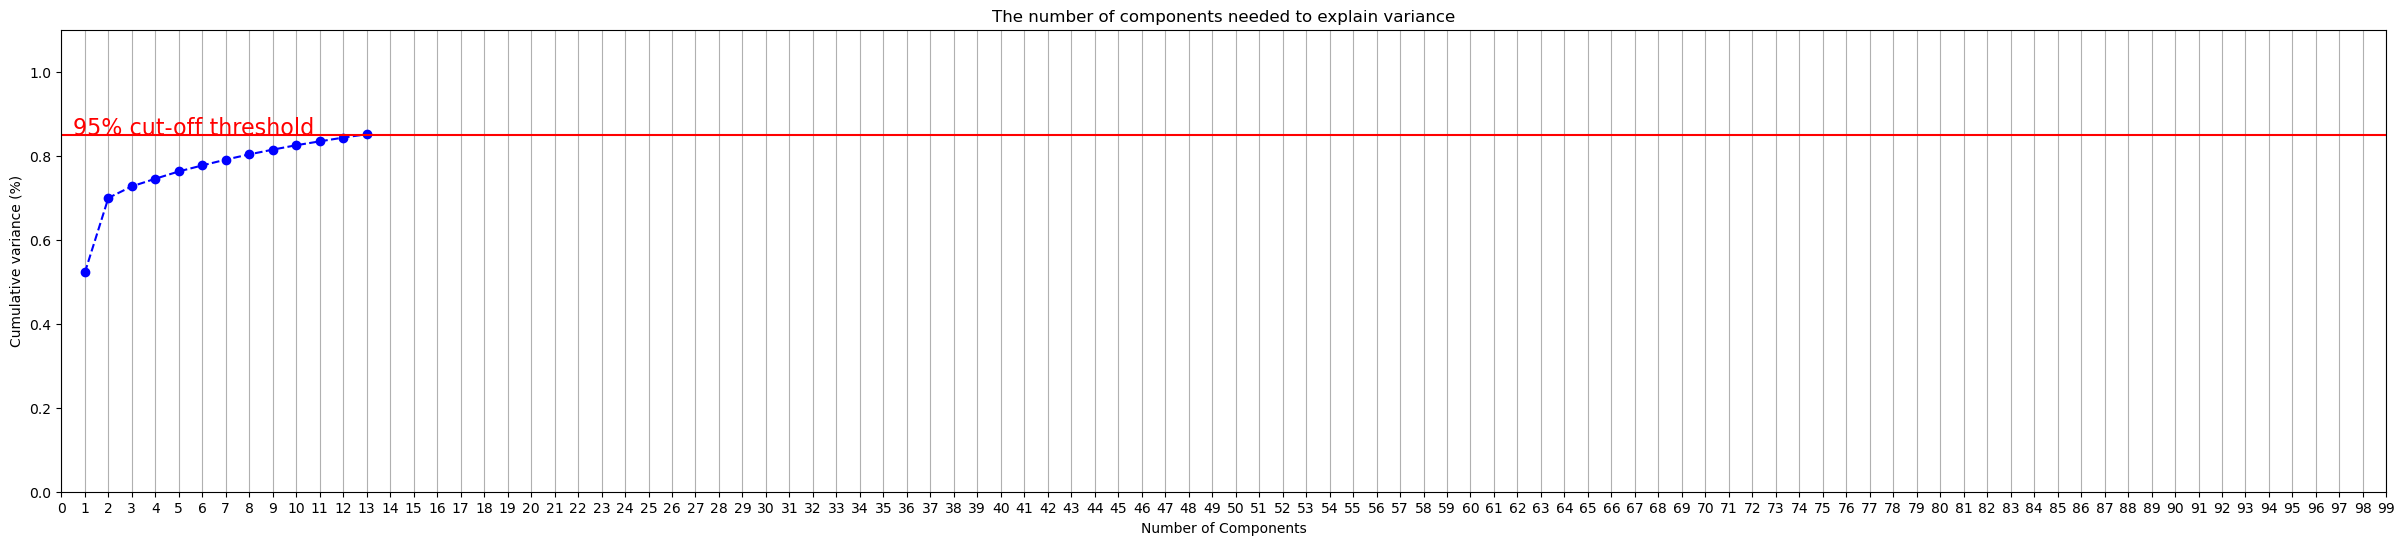

In [7]:
# % matplotlib inline
plt.rcParams["figure.figsize"] = (30,6)

fig, ax = plt.subplots()
xi = np.arange(pca.n_components_) + 1
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 100, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [8]:
dp_pca=pca.fit_transform(data_rescaled)

In [9]:
dp_pca.shape

(179, 13)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(dp_pca,label,test_size=0.3)

In [11]:
x_train.shape

(125, 13)

In [12]:
x_test.shape

(54, 13)

In [13]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [16]:
y_pred = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.984


In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3888888888888889


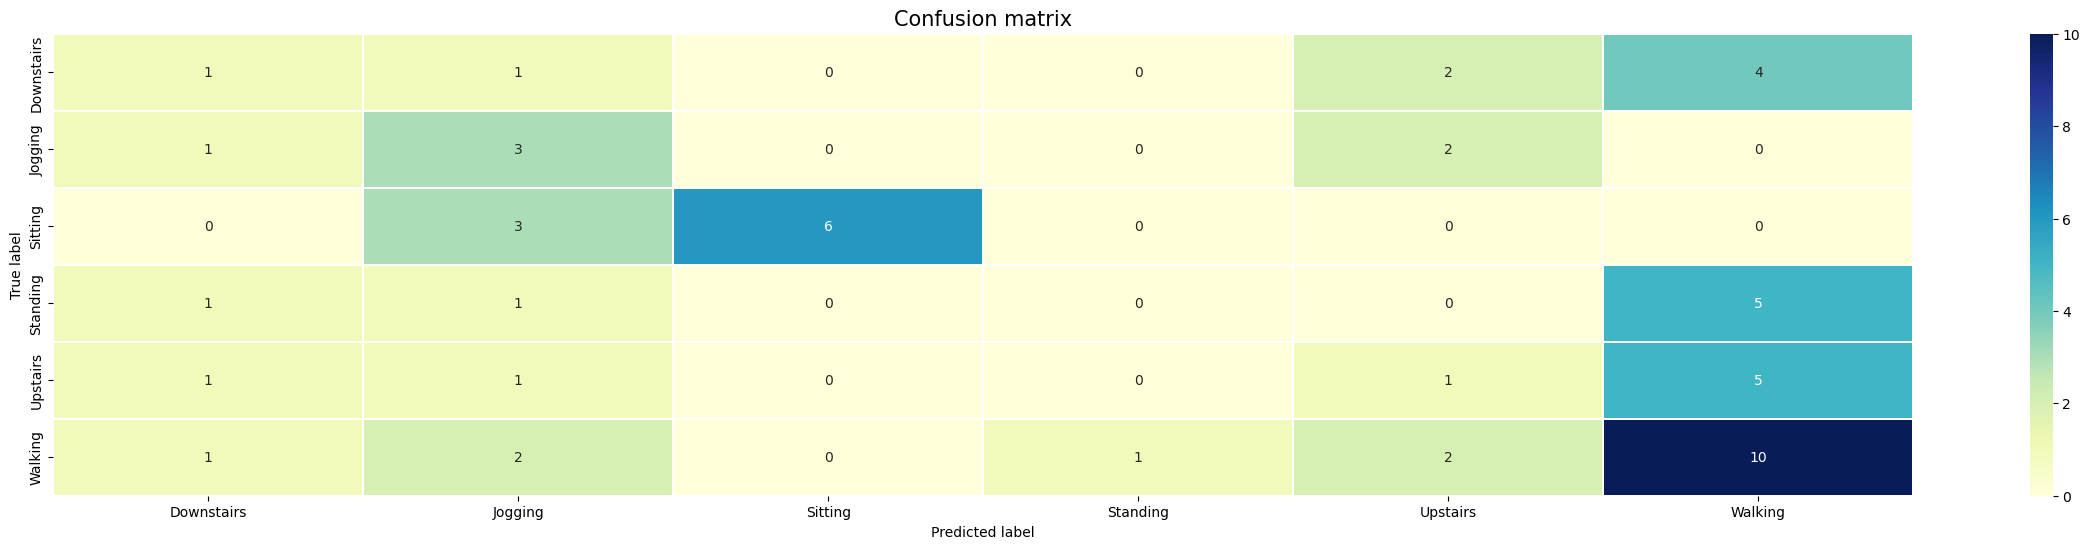

In [15]:
from sklearn.metrics import confusion_matrix
labels = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()